In [2]:
import csv
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = [15, 15]
from tqdm import tqdm_notebook
import random
import numpy as np
from time import time

In [3]:
def read_points(dataset_name, y_col_number):
    x = []
    y = []
    with open (dataset_name, 'r') as fin:
        csvReader = csv.reader(fin, delimiter=',')
        for row in csvReader:
            if csvReader.line_num != 1:
                float_row = []
                for i in range(0, len(row)):
                    if i != y_col_number:
                        float_row.append(float(row[i]))
                x.append(float_row)
                y.append(float(row[y_col_number]))
    return x, y

In [4]:
def path_length(x):
    dist = 0
    for i in range(1, len(x)):
        dist += np.abs(x[i][0] - x[i - 1][0]) + np.abs(x[i][1] - x[i - 1][1])
    return dist

In [5]:
def cross(x1, x2):
    index = random.randint(0, len(x1) - 1)
    new_x1 = x1[:index]
    new_x2 = x2[:index]
    for i in range(len(x2)):
        if not (x2[i] in new_x1):
            new_x1.append(x2[i])
    for i in range(len(x1)):
        if not (x1[i] in new_x2):
            new_x2.append(x1[i])
    return new_x1, new_x2

In [6]:
def mutate(x, prob=0.05):
    change = np.random.choice([0, 1], p=[1 - prob, prob])
    if change == 1:
        i = random.randint(0, len(x) - 1)
        j = random.randint(0, len(x) - 1)    
        if (i > j) :
            x[j:i] = x[j:i][::-1]
        else:
            x[i:j] = x[i:j][::-1]
    return x

In [7]:
def genetic(max_generation=100000, population_size=5):
    x, _ = read_points("../Datasets/tsp.csv", 0)
    population = []
    distances = []
    random.seed(time())
    for i in range(population_size):
        copy = x[:]
        np.random.shuffle(copy)
        population.append(copy)
        distances.append(path_length(population[i]))

    for _ in tqdm_notebook(range(max_generation)):
        first_best = distances.index(min(distances))
        second_best = distances.index(min(distances[:first_best] + distances[first_best + 1:]))
        child1, child2 = cross(population[first_best], population[second_best])
        child1 = mutate(child1)
        child2 = mutate(child2)
        worst = distances.index(max(distances))
        ch1_dist = path_length(child1)
        if ch1_dist < distances[worst]:
            population[worst] = child1
            distances[worst] = ch1_dist
        worst = distances.index(max(distances))
        ch2_dist = path_length(child2)
        if ch2_dist < distances[worst]:
            population[worst] = child2
            distances[worst] = ch2_dist
    
    x = population[distances.index(min(distances))]
    print("Length = " + str(path_length(x)))

    l1_path = []
    for i in range(1, len(x)):
        l1_path.append(x[i - 1])
        l1_path.append([x[i - 1][0], x[i][1]])
    l1_path.append(x[len(x) - 1])
    plt.plot(np.array(l1_path)[:,0], np.array(l1_path)[:,1])
    plt.show()


Length = 9480.0


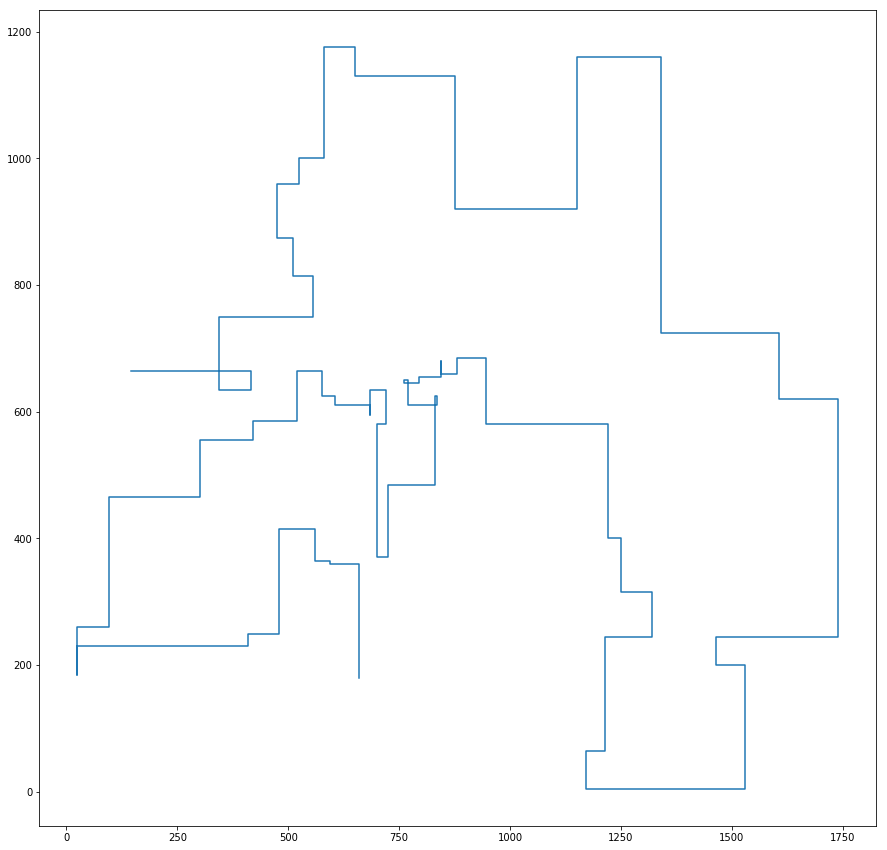

In [8]:
genetic()